## **Double-Degree Array** ##

In [ ]:
with open("rosalind_ddeg.txt", "r") as f:
    n, edges = f.readline().strip().split(" ")
    edges_list = [line.strip().split(" ") for line in f]
# print(n, edges)
# print(edges_list)

nodes_neighbours = {}
for i in range(int(n)):
    nodes_neighbours[str(i+1)] = [t for l in edges_list for t in l if str(i+1) in l and str(i+1) != t]

for i in range(int(n)):
    print(sum([len(nodes_neighbours[k]) for k in nodes_neighbours[str(i+1)]]), end=" ")

In [ ]:
import networkx as nx

# Read the input from the file
input_file = "DDEG.txt"

# Read the graph from the input file
G = nx.read_edgelist(input_file, nodetype=int, data=False, delimiter=" ")

print(G)
# # Calculate the double-degree array
# D = {}
# for u in G.nodes():
#     s = 0
#     for v in G[u]:
#         s += G.degree(v)
#     D[u] = s

# # Sort the dictionary based on the keys (vertex numbers)
# D = sorted(D.items(), key=lambda x: x[0])

# # Extract the values (degree sums) from the sorted dictionary
# _, degs = zip(*D)

# # Print the double-degree array
# print(" ".join(map(str, degs)))


## **Breadth-First Search** ##

In [127]:
with open("rosalind_bfs.txt", "r") as f:
    n, m = map(int, f.readline().strip().split(" "))
    edges_list = [tuple(map(int, line.strip().split(" "))) for line in f]

0 8 6 5 6 5 6 7 -1 8 6 3 7 5 7 5 7 6 5 7 -1 4 6 4 6 7 6 6 6 7 5 6 7 7 -1 7 6 6 5 6 7 5 6 7 6 8 8 5 7 5 4 4 6 4 7 6 5 6 6 5 4 7 5 7 7 8 7 6 6 5 6 7 7 7 6 7 8 -1 5 7 5 6 6 6 5 8 7 7 8 4 9 8 5 4 5 6 7 5 8 6 7 8 6 10 7 6 5 8 7 7 6 4 5 -1 7 6 6 7 6 6 3 3 6 7 5 6 6 5 6 8 8 6 7 2 7 7 4 5 6 4 6 8 4 5 5 6 4 6 -1 9 5 6 8 7 4 3 8 4 -1 6 4 -1 5 7 -1 7 2 8 -1 5 6 6 9 8 7 -1 5 6 6 6 7 6 6 5 9 6 7 7 6 6 8 4 7 9 10 -1 6 3 6 6 9 7 -1 7 6 7 7 7 8 6 7 6 6 -1 5 9 5 6 4 5 6 6 5 8 6 5 7 8 5 7 6 7 5 9 7 -1 7 7 3 7 6 8 -1 6 5 5 8 5 8 6 6 7 4 -1 8 6 6 7 6 8 4 9 5 6 6 7 -1 6 7 6 6 7 6 7 -1 8 7 8 3 4 -1 7 6 6 8 5 6 4 8 5 6 8 8 -1 -1 4 6 7 5 5 5 6 2 6 5 6 7 5 6 10 5 6 7 6 6 5 7 7 4 5 6 7 3 6 5 6 6 7 5 4 6 4 6 6 5 7 -1 9 6 7 3 7 5 6 4 6 8 5 5 6 8 -1 9 5 8 7 8 6 -1 7 7 5 6 8 5 5 -1 8 -1 7 -1 5 8 7 3 5 8 7 6 6 6 4 7 5 6 7 -1 6 1 5 7 5 5 3 7 7 7 -1 2 5 7 8 4 7 7 6 6 4 9 6 4 5 7 7 7 5 6 7 8 6 6 6 6 8 7 9 6 7 5 7 5 5 6 5 6 6 8 6 5 4 -1 -1 6 6 -1 6 6 7 9 7 6 6 2 6 -1 -1 8 5 5 7 6 5 7 6 7 3 7 9 8 -1 7 3 8 5 7 8 6 7 3 7 6

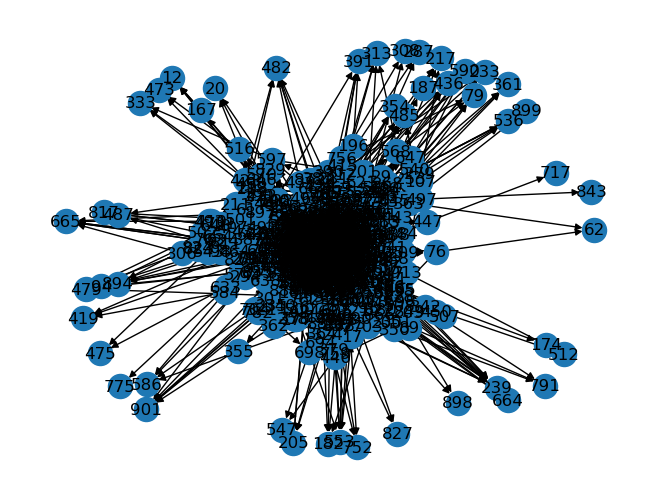

In [128]:
def compute_shortest_path_lengths(n, edges_list):
    G = nx.DiGraph()
    G.add_edges_from(edges_list)
    bfs_result = nx.bfs_predecessors(G, source=1)
    nx.draw(G,with_labels=True)
    # Initialize the array with -1 for unreachable vertices
    shortest_distances = [-1] * n
    shortest_distances[0] = 0  # Source vertex has distance 0
    for vertex, predecessor in bfs_result:
        shortest_distances[vertex - 1] = shortest_distances[predecessor - 1] + 1

    return shortest_distances

shortest_distances = compute_shortest_path_lengths(n, edges_list)
print(" ".join(map(str, shortest_distances)))

### **Connected Components** ###

In [40]:
import networkx as nx
with open("rosalind_cc.txt","r") as f:
    n,m = map(int, f.readline().strip().split(" "))
    edges_list = [tuple(map(int,line.strip().split(" ")))for line in f]

def connected_component(n, edges_list):
    G = nx.Graph()
    G.add_nodes_from(range(1, n+1))
    G.add_edges_from(edges_list)
    nx.draw(G,with_labels=True)
    connected_components = nx.connected_components(G)
    print(len(list(connected_components)))
    
connected_component(n, edges_list)

## **Testing Bipartiteness** ## 

[-1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1]


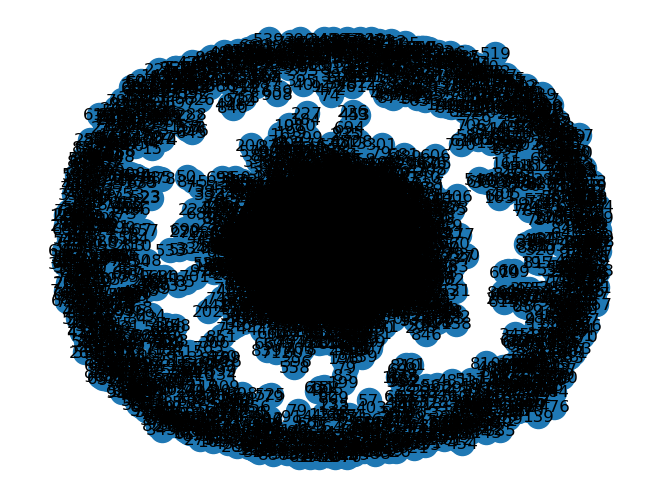

In [126]:
import networkx as nx



def read_graph_from_input(lines):
    lines = [line for line in lines if line.strip()]
    # print(lines)
    
    current_line = 1
    
    graphs = []
    
    for i in range(int(lines[0])):
        n,m = map(int,lines[current_line].strip().split())
        # print(n,m)
        
        edges_list = [tuple(map(int, line.strip().split())) for line in lines[current_line+1 : current_line+m+1]]
        # print(edges_list)
        
        G = nx.Graph()
        G.add_nodes_from(range(1, n+1))
        G.add_edges_from(edges_list)
        nx.draw(G, with_labels=True)
        
        
        graphs.append(G)
        current_line += m+1
        
    return graphs

def test_bipartiteness(graphs):
    results = []

    for graph in graphs:
        is_bipartite = nx.is_bipartite(graph)
        results.append(1 if is_bipartite else -1)

    return results

        

with open("rosalind_bip.txt","r") as f:
    lines= f.read().strip().split('\n')
    graphs = read_graph_from_input(lines)
    print(test_bipartiteness(graphs))

## **Testing Acyclicity** ##

-1 -1 1 -1 1 -1 1 1 -1 1 1 1 1 -1 1 -1 1 -1 1


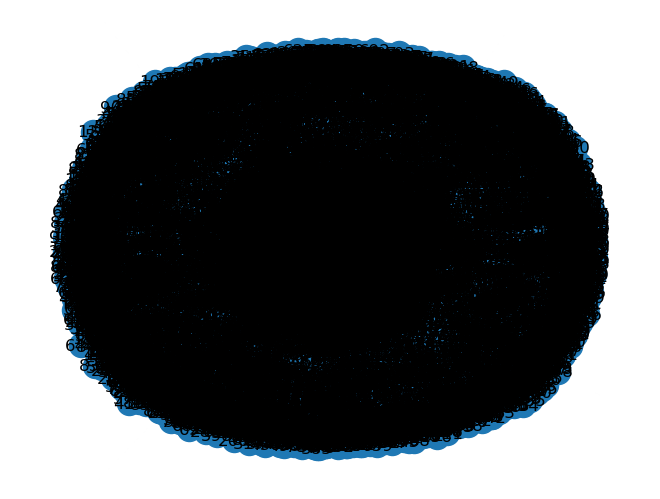

In [161]:
import networkx as nx

def read_graph_from_input(lines):
    lines = [line for line in lines if line.strip()]
    current_line = 1
    graphs = []
    
    for i in range(int(lines[0])):
        n, m = map(int, lines[current_line].strip().split())
        edges_list = [tuple(map(int, line.strip().split())) for line in lines[current_line+1 : current_line+m+1]]
        G = nx.DiGraph()  # Use DiGraph() to create a directed graph
        G.add_nodes_from(range(1, n+1))
        G.add_edges_from(edges_list)
        graphs.append(G)
        nx.draw(G, with_labels=True)
        current_line += m+1
        
    return graphs

def test_acyclicity(graphs):
    results = []
    
    for graph in graphs:
        is_acyclic = nx.is_directed_acyclic_graph(graph)
        results.append(1 if is_acyclic else -1)

    return results

with open("rosalind_dag.txt", "r") as f:
    lines = f.read().strip().split('\n')
    graphs = read_graph_from_input(lines)
    print(*test_acyclicity(graphs))


## **Dijkstra's Algorithm** ##

{1: 0, 971: 138, 898: 312, 637: 529, 638: 549, 253: 630, 945: 703, 649: 743, 926: 777, 640: 860, 128: 863, 550: 879, 474: 891, 105: 895, 176: 903, 281: 910, 122: 931, 981: 935, 10: 954, 196: 970, 329: 971, 961: 1025, 555: 1028, 759: 1056, 315: 1122, 510: 1125, 407: 1164, 761: 1182, 97: 1187, 191: 1190, 452: 1193, 216: 1200, 349: 1211, 377: 1218, 732: 1224, 102: 1242, 73: 1248, 51: 1265, 42: 1275, 405: 1276, 903: 1302, 323: 1305, 601: 1330, 36: 1350, 641: 1352, 964: 1357, 781: 1362, 292: 1373, 309: 1377, 371: 1389, 542: 1392, 8: 1393, 794: 1396, 589: 1399, 662: 1401, 756: 1404, 43: 1408, 331: 1408, 652: 1412, 687: 1420, 711: 1422, 554: 1424, 304: 1432, 297: 1434, 785: 1437, 201: 1442, 333: 1451, 440: 1458, 131: 1460, 245: 1462, 20: 1468, 135: 1468, 718: 1474, 69: 1477, 943: 1481, 896: 1481, 537: 1484, 150: 1486, 89: 1487, 312: 1491, 104: 1501, 480: 1502, 584: 1506, 530: 1506, 211: 1509, 894: 1509, 883: 1511, 593: 1518, 618: 1528, 207: 1535, 289: 1542, 726: 1545, 832: 1564, 193: 1570, 79

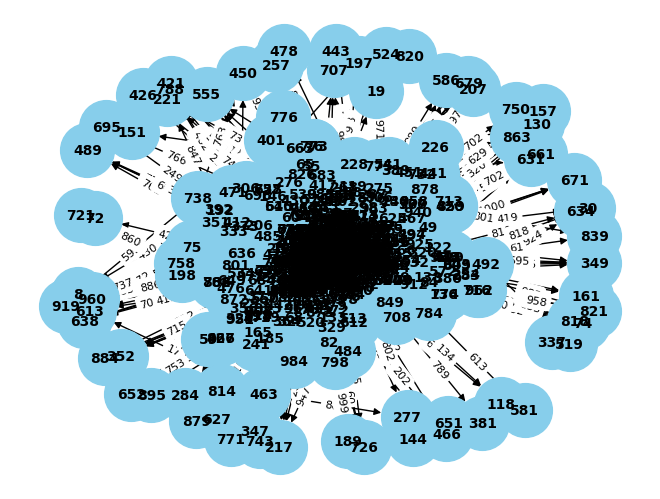

In [205]:
import networkx as nx

def read_graph_from_input(n, m, edges_list):
    G = nx.DiGraph()
    G.add_nodes_from(range(1, n+1))
    G.add_weighted_edges_from(edges_list)
    return G

def dijkstra_shortest_paths(graph):
    shortest_paths = nx.single_source_dijkstra(graph, source=1)
    distances = shortest_paths[0]
    print(distances)
    return distances

with open("rosalind_dij.txt", "r") as f:
    n, m = map(int, f.readline().strip().split())
    edges_list = [tuple(map(int, line.strip().split())) for line in f]
    graph = read_graph_from_input(n, m, edges_list)
    distances = dijkstra_shortest_paths(graph)

# Draw the graph with labels and edge weights
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold")
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)
    
    
# Adjust the output to account for 1-based indexing
adjusted_distances = [distances[i] if i in distances else -1 for i in range(1, n+1)]
print(*adjusted_distances)


## **Square in a Graph** ##

In [229]:
import networkx as nx

def read_graph_from_input(lines):
    lines = [line for line in lines if line.strip()]
    current_line = 1
    graphs = []
    
    for i in range(int(lines[0])):
        n, m = map(int, lines[current_line].strip().split())
        edges_list = [tuple(map(int, line.strip().split())) for line in lines[current_line+1 : current_line+m+1]]
        G = nx.Graph()  # Use Graph() to create an undirected graph
        G.add_nodes_from(range(1, n+1))
        G.add_edges_from(edges_list)
        graphs.append(G)
        current_line += m+1
        
    return graphs

def has_cycle_of_length_4(graph):
    cycles = nx.cycle_basis(graph)
    for cycle in cycles:
        if len(cycle) == 4:
            return True
    return False

def square_in_graph(graphs):
    results = []
    
    for graph in graphs:
        has_cycle_of_length_4 = has_cycle_of_length_4(graph)
        results.append(1 if has_cycle_of_length_4 else -1)

    return results

with open("rosalind_sq.txt", "r") as f:
    lines = f.read().strip().split('\n')
    graphs = read_graph_from_input(lines)
    print(*square_in_graph(graphs))


UnboundLocalError: cannot access local variable 'has_cycle_of_length_4' where it is not associated with a value